# Simplex example

## Try me

## Try me
 [![Open In Colab](../../_static/binder_badge.png)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/CLP/tutorials/Simplex%20Graphic%20explanation.ipynb)[![Binder](../../_static/binder_badge.png)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FCLP%2Ftutorials%2FSimplex%20Graphic%20explanation.ipynb)

## Graphic and algebraic correspondences
In this notebook we will analyse the Simplex algorithm alternating between the graphical and the algebraic representation and using a problem as an example:

### Problem Definition
Production Mix
A company produces two kinds of products, P1 and P2.

The selling price of P1 is 300€
The selling price of P2 is 250€

- P1 requires 2 operator man hours and 1 hour of machine operating time
- P2 requires 1 operator man hours and 3 hours of machine time
- Operator man hours cannot be higher than 40 hours per day
- Machine operating time cannot be higher than 45 hours per day
- Marketing states that P1 units per day cannot be higher than 12


***How many units of P1 and P2 should the company produce every day to maximise income?*** 

### Model
We want to find the maximum solution to:

$max Z = 300x_{1} + 250x_{2}$

This is our objective function. The decision variables are:

$x_{1}:$ units of Product 1

$x_{2}:$ units of Product 2

The objective function is subject to the following constraints:

$2x_{1} + x_{2} \leq 40$  
$x_{1} + 3x_{2} \leq 45$  
$x_{1} \leq 12$  

We define the problem in its standard form as:

$max Z = 300x_{1} + 250x_{2} + 0s_{1} + 0s_{2} + 0s_{3}$

Where: 

$s_{1}:$ Slack variable of the operator man hour constraint ($s_1 \geq 0$)

$s_{2}:$ Slack variable of the machining time constraint ($s_2 \geq 0$)

$s_{3}:$ Slack variable of the operator man hour constraint ($s_3 \geq 0$)

And thus, by entering the slack variables, we can now express the constraints as:

$2x_{1} + x_{2} + s_{1} = 40$  
$x_{1} + 3x_{2} + s_{2} = 45$  
$x_{1} + s_{3} = 12$  

### Solution 
We will use the Simplex Method and iterate between the graphical and the algebraic form of the problem to describe the results.
First let us represent the problem:

Text(12, 11, 'E')

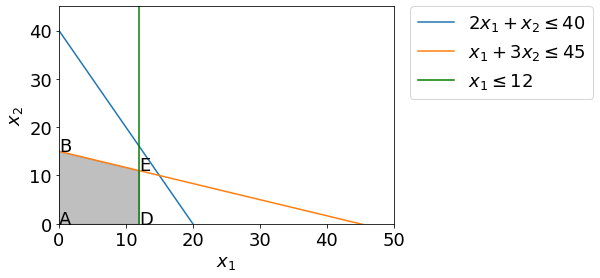

In [1]:
# Alias to use numpy library functions
import numpy as np
import matplotlib
# Alias to use matplotlib
import matplotlib.pyplot as plt   
# Inline is used to get the output of matplotlib to the output of the cell
%matplotlib inline                

# Construct lines, x represents our decision variable x1 and y represents our decision variable x2
# x > 0
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100
# y1 represents the line of constraint 2x1 + x2 <= 40
y1 = -2*x + 40
# y2 represents the line of the constraint x1 + 3x2 <= 45
y2 = (45-x)/3.0
# x2 represents a constraint at y2 <12 used for convenience
x2 = (12 - x*0)


matplotlib.rcParams.update({'font.size': 18})

#1. Make plot
plt.plot(x, y1, label=r'$2x_{1} + x_{2} \leq 40$')             #Plot y1
plt.plot(x, y2, label=r'$x_{1} + 3x_{2} \leq 45$')    #Plot y2
plt.axvline(x=12, label=r'$x_{1} \leq 12$', c='g')           #plot y3

#2. Adjust axis
plt.xlim((0, 50))
plt.ylim((0, 45))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region
y4=np.minimum(y1, y2)  #line representing the maximum between y3 and y2
plt.fill_between(x, y4, 0, where=x<12, color='grey', alpha=0.5) #fill where y5 ys greater than y6

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#5 Annotate graph
plt.annotate('A', xy=(0, 0))
plt.annotate('B', xy=(0, 15))
plt.annotate('D',xy=(12, 0))
plt.annotate('E', xy=(12,11))

The feasible region (in grey) contains all possible solutions to the objective function. 

Let us now represent the same problem in a basic Tableau:

| z | $x_1$  |  $x_2$ | $s_1$  | $s_2$  | $s_{3}$| RHS |  
|---|--------|--------|--------|--------|--------|-----|
| 1 | -300   |  -250  |   0    |   0    |   0    |  0  |
| 0 |   2    |   1    |   1    |   0    |   0    |  40 |
| 0 |   1    |   3    |   0    |   1    |   0    |  45 |
| 0 |   1    |   0    |   0    |   0    |   1    |  12 | 

From the Tableau, we can easily find a first Feasible Basic Solution (FSB), by making $x_{1}$ and $x_{2}$ non basic (=0). 
The three equations of the constraints provide us the value of the slack variables in this solution:

$x_{1} = 0 \\
x_{2} = 0 \\
s_{1} = 40 \\
s_{2} = 45 \\
s_{3} = 12$

Let us note this solution as (0,0,40,45,12) and z=0. Note that this FSB corresponds to Vertex A in the figure.
How can we know if it is optimal?
We have 2 non basic variables $x_{1}$ and $x_{2}$ which have negative coefficients in the objective function and positive values of this variables would increase z. If we increase $x_{1}$ in one unit, z would increase 300 units and if we increase $x_{2}$ in one unit z would increase 250. Therefore, the solution is not optimal, since we could find a higher z for a positive value of these variables in the objective function. 
Hence, this is not the optimal solution and we need to look for it in another vertex. From point A, we could either move to vertex B or to vertex D. 
Moving towards D would mean making $x_{1}$ higher than zero, thus making it a **basic variable**. Likewise, moving towards B would mean making $x_{2}$ higher than zero and basic (enter the base). We select $x_{1}$ as the **entering** basic variable, since its coefficient (300) is higher and therefore z will increase at a higher rate when we move towards D. We have just selected the pivot variable and the pivot column in the Tableau.


Now, we are going to move towards D, which is equivalent to make $x_{1} = \delta$. As this value increases, the objective value will also increase, but we have to bear in mind that all variables must be positive and therefore $\delta$ cannot take any given value: we have to make sure the solution is **feasible**. If we write down all the constraints in algebraic form, we can find the possible values of $\delta$ 

$2*\delta  + 1*0 + s_{1} = 40 \\  
1*\delta  + 3*0 + s_{2} = 45 \\
1*\delta  + s_{3} = 12$  

To ensure that all the surplus variables are positive $\delta$ cannot exceed the maximum positive value that guarantees that all the surplus variables are non negative. Out strategy to find a feasible solution is to make on slack variable **non-basic** (equal to zero), but making sure that all the constraints are met. 
Since we only have $\delta$ and a slack variable in each expression, making the corresponding slack variable equal to zero is equivalent to making $\delta\ equal to the RHS divided by the coefficient, which means that the maximum value it can take is $\delta = min(40/2, 45/1, 12/1)$. Any value above this makes the solution unfeasible. This is called the **Ratio test**. If we make $x_{1} = \delta = 12$ then that implies that $s_{3}$ is now a non-basic variable. With the Ratio test, we have selected $s_{3}$ as the **leaving** variable which will no longer be basic in the FSB.
Let us add two new columns to the basic Tableau, one to the right to indicate which variable is the basic variable in the equation and another one to the left to express this Ratio test.

|Basic  | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ |  RHS   |  Ratio   |  
|-------|---|---------|---------|---------|---------|---------|--------|----------|
|  -    | 1 | -300    |   -250  |   0     |   0     |   0     |   0    |     -    |
|$s_{1}$| 0 |   2     |    1    |   1     |   0     |   0     |   40   |  40/2=20 |
|$s_{2}$| 0 |   1     |    3    |   0     |   1     |   0     |   45   |  45/1=45 |
|$s_{3}$| 0 |   1     |    0    |   0     |   0     |   1     |   12   |  12/1=12 |

Now, notice that from the Ratio test, we have easily determined that the variable that leaves the basic solution is $s_{3}$ and using the last equation we can easily determine that $x_1=12$ in the new solution. We will move to another solution (12,0,?,?,0) which corresponds exactly to point D. Now notice that in the first iteration, the problem was expressed in a very convenient way since we had only a non-zero (1) value for each basic variable in every row. To accomplish this, we are going to transform the different rows. Since the equations are linearly independent, we can make linear operations in the different equations and still obtain a linear independent system of equations. We want to obtain a system like this:

|Basic  | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ |  RHS   |  Ratio   |  
|-------|---|---------|---------|---------|---------|---------|--------|----------|
|   -   | 1 | 0       |    ?    |   0     |   0     |   ?     |   ?    |    -     |
|$s_{1}$| 0 |   0     |    ?    |   1     |   0     |   ?     |   ?    |  ?       |
|$s_{2}$| 0 |   0     |    ?    |   0     |   1     |   ?     |   ?    |  ?       |
|$x_{1}$| 0 |   1     |    ?    |   0     |   0     |   ?     |   ?    |  ?       |

Note that when the problem is in this form, we will have each basic variable in a row with coefficient 1 and the rest with coefficient 0 and we will be able to obtain the value for each basic variable rather easily. First we transform the **leaving** equation, by dividing the entire raw by the coefficient of the entering variable in that equation (in this case is 1) and the raw remains unaltered:

|Basic  | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ |  RHS   |  Ratio   |  
|-------|---|---------|---------|---------|---------|---------|--------|----------|
|-      | 1 | 0    |   ?  |   0     |   0     |   ?     |    ?   |      -   |
|$s_{1}$| 0 |   0     |    ?    |   1     |   0     |   ?     |   ?    |    ?     |
|$s_{2}$| 0 |   0     |    ?    |   0     |   1     |   ?     |   ?    |    ?     |
|$x_{1}$| 0 |   1/1=1 |  0/1=0  | 0/1=0   | 0/1=0   | 1/1=1   |12/1=12 |    ?     |


Now, for the rest of the row, we need to make a linear operation that gives a zero in the cell corresponding to the entering variable. To accomplish this, we substract the **entering equation** multiplied by the value of the coefficient that multiplies the entering variable  $x_{1}$.

| Basic   | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$  | RHS         | Ratio |
|---------|---|---------|---------|---------|---------|----------|-------------|-------|
| -       | 1 | -300-(-300·1)=0       | -250-(-300·0)=0    | 0-(-300·0)=0       | 0-(-300·0)=0       | 0-(-300·1)=300      | 0-(-300·12)=3600 | -     |
| $s_{1}$ | 0 | 2-2·1=0 | 1-2·0=1 | 1-2·0=1 | 0-2·0=0 | 0-2·1=-2 | 40-12·2=16  | ?     |
| $s_{2}$ | 0 | 1-1·1=0 | 3-1·0=3 | 0-1·0=0 | 1-1·0=1 | 0-1·1=-1 | 45-12·1=33  | ?     |
| $x_{1}$ | 0 | 1       | 0       | 0       | 0       | 1        | 12          | ?     |

We end up with the following Tableau:

| Basic   | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ | RHS  | Ratio |
|---------|---|---------|---------|---------|---------|---------|------|-------|
| -       | 1 | 0       | -250    | 0       | 0       | 300     | 3600 | -     |
| $s_{1}$ | 0 | 0       | 1       | 1       | 0       | -2      | 16   | ?     |
| $s_{2}$ | 0 | 0       | 3       | 0       | 1       | -1      | 33   | ?     |
| $x_{1}$ | 0 | 1       | 0       | 0       | 0       | 1       | 12   | ?     |

And the new FSB solution is (12, 0, 16, 32, 0) which as noted corresponds to point D. 

z has increased from 0 to 3600, but we still have a coefficient in $x_{2}$ that is lower than zero and therefore we could find a higher value if again we move from D to E by increasing $x_{2}$, just as we did with $x_{1}$. We have selected the next entering variable and the pivot column and we can perform the Ratio test again to select the variable leaving the basic solution:

| Basic   | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ | RHS  | Ratio |
|---------|---|---------|---------|---------|---------|---------|------|-------|
| -       | 1 | 0       | -250    | 0       | 0       | 300     | 3600 | -     |
| $s_{1}$ | 0 | 0       | 1       | 1       | 0       | -2      | 16   |16    |
| $s_{2}$ | 0 | 0       | 3       | 0       | 1       | -1      | 33   | 11    |
| $x_{1}$ | 0 | 1       | 0       | 0       | 0       | 1       | 12   | 12    |

The minimum value that makes all variables positive is 11. Therefore, the variable leaving the solution is $s_{2}$. We first transform the new entering row:

| Basic   | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ | RHS | Ratio |
|---------|---|---------|---------|---------|---------|---------|-----|-------|
| -       | 1 | ?       | 0       | 0       | ?       | ?       | ?   | -     |
| $s_{1}$ | 0 | 0       | 0       | 1       | ?       | ?       | ?   | ?     |
| $x_{2}$ | 0 | 0       | 1       | 0       | 1/3     | -1/3    | 11  | ?     |
| $x_{1}$ | 0 | 1       | 0       | 0       | ?       | ?       | ?   | ?     |

And then the rest of the rows using linear transformations as we did before we obtain.

| Basic   | z | $x_{1}$ | $x_{2}$ | $s_{1}$ | $s_{2}$ | $s_{3}$ | RHS  | Ratio |
|---------|---|---------|---------|---------|---------|---------|------|-------|
| -       | 1 | 0-(-250·0)=0       | -250-(-250·1)=0       | 0-(-250·0)=0       | 0-(-250·1/3)=250/3| 300-(-250·-1/3)=650/3| 3600-(-250·11)=6350 | -     |
| $s_{1}$ | 0 | 0       | 1-1=0   | 1-0=0   |0-1/3=-1/3| -2-(-1/3)=-5/3| 16-11=5    | -     |
| $x_{2}$ | 0 | 0       | 1       | 0       | 1/3     | -1/3    | 11   | -     |
| $x_{1}$ | 0 | 1       | 0       | 0       | 0       | 1       | 12   | -     |

Now we obtain a new solution (12, 11, 5, 0, 0) where z = 6350 and we know for sure that this is a maximum because there are no negative coefficients for any of the non-basic variables that could yield to a higher value of z.


Text(12, 11, 'E')

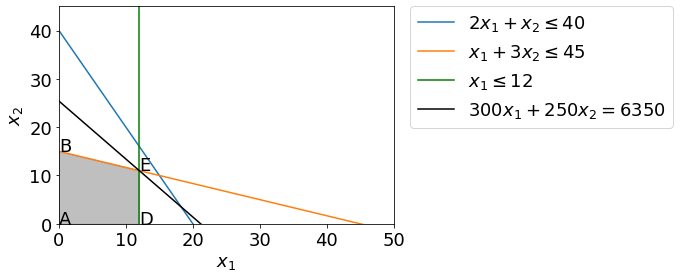

In [2]:
# Alias to use numpy library functions
import numpy as np
import matplotlib
# Alias to use matplotlib
import matplotlib.pyplot as plt   
# Inline is used to get the output of matplotlib to the output of the cell
%matplotlib inline                

# Construct lines, x represents our decision variable x1 and y represents our decision variable x2
# x > 0
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100
# y1 represents the line of constraint 2x1 + x2 <= 40
y1 = -2*x + 40
# y2 represents the line of the constraint x1 + 3x2 <= 45
y2 = (45-x)/3.0


matplotlib.rcParams.update({'font.size': 18})

#1. Make plot
plt.plot(x, y1, label=r'$2x_{1} + x_{2} \leq 40$')             #Plot y1
plt.plot(x, y2, label=r'$x_{1} + 3x_{2} \leq 45$')    #Plot y2
plt.axvline(x=12, label=r'$x_{1} \leq 12$', c='g')           #plot y3

#2. Adjust axis
plt.xlim((0, 50))
plt.ylim((0, 45))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region
y4=np.minimum(y1, y2)  #line representing the maximum between y3 and y2
plt.fill_between(x, y4, 0, where=x<12, color='grey', alpha=0.5) #fill where y5 ys greater than y6

y5 = (6350-300*x)/250  #line representing the solution

plt.plot(x, y5, label=r'$300x_{1} + 250x_{2} = 6350$', c='k')

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#5 Annotate graph
plt.annotate('A', xy=(0, 0))
plt.annotate('B', xy=(0, 15))
plt.annotate('D',xy=(12, 0))
plt.annotate('E', xy=(12,11))